### <b> Dataset Overview </b>
    This Dataset represents the dimensions of the species of iris flower ,It consists of  150 samples of iris flowers, each belonging to one of three species: Setosa, Versicolor, and Virginica. For each sample, four features are measured: length and width of the sepals and petals.

### <b> Column Descriptions </b>
- `Id`: Unique identifier for each row 
- `SepalLengthCm`: Represents the length of the sepal in centimeters.
- `SepalWidthCm`: Represents the width of the sepal in centimeters.
- `PetalLengthCm`: Represents the length of the petal in centimeters.
- `PetalWidthCm`: Represents the width of the petal in centimeters.
- `Species`: Specifies the species of each flower as : "Iris-setosa" or "Iris-versicolor" or "Iris-virginica".


### <b>Manual Analysis</b>
    By overviewing the dataset manually there are no any visible issues so,
    lets check the data programatically for any issues further.


### <b>Data Wrangling

#### 1.Gathering Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"E:\Nexus Internship\Phase 1\Iris.csv")
df1 = df  # creating copy of the dataset for preventing data loss while preprocessing

In [3]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 2.Assessing Data

In [4]:
# Finding number of rows and columns 
print(df.shape)

(150, 6)


In [5]:
# Reviewing data types of different columns
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
# Checking if there are any missing values in the data sets
# Finding the missing values for each columns
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Checking for duplicates in the datasets
df.duplicated().sum()

0

In [8]:
# Analysing how much memory is occupied by the data 
(df.memory_usage().sum())/1024

7.16015625

In [9]:
# Mathematical Overview of the data (only applicable for numeric columns)
with pd.option_context('display.float_format', '{:.3f}'.format):
    print("\nDataFrame.describe() with Custom Formatting:")
    print(df.describe())


DataFrame.describe() with Custom Formatting:
           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count 150.000        150.000       150.000        150.000       150.000
mean   75.500          5.843         3.054          3.759         1.199
std    43.445          0.828         0.434          1.764         0.763
min     1.000          4.300         2.000          1.000         0.100
25%    38.250          5.100         2.800          1.600         0.300
50%    75.500          5.800         3.000          4.350         1.300
75%   112.750          6.400         3.300          5.100         1.800
max   150.000          7.900         4.400          6.900         2.500


In [10]:
# Mathematical overview of categorical data (somewhat useful)
df.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


#### 3.Data Cleaning

So far , there are no any issues in the dataset we will get to know more about the data quality by performing further analysis and visualizations<b> so at this stage the data is already clean as there are no any missing,duplicate or messy values hence we will skip data cleaning <b>

### <b>Univariate Analysis</b>

### Univariate Analysis on numerical columns 

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
numerical_columns = df1.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df1.select_dtypes(include=['object']).columns.tolist()

print(" Numerical Columns -",numerical_columns,"\n\n","Categorical Columns - ",categorical_columns)

 Numerical Columns - ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 

 Categorical Columns -  ['Species']


<Axes: xlabel='PetalWidthCm', ylabel='Count'>

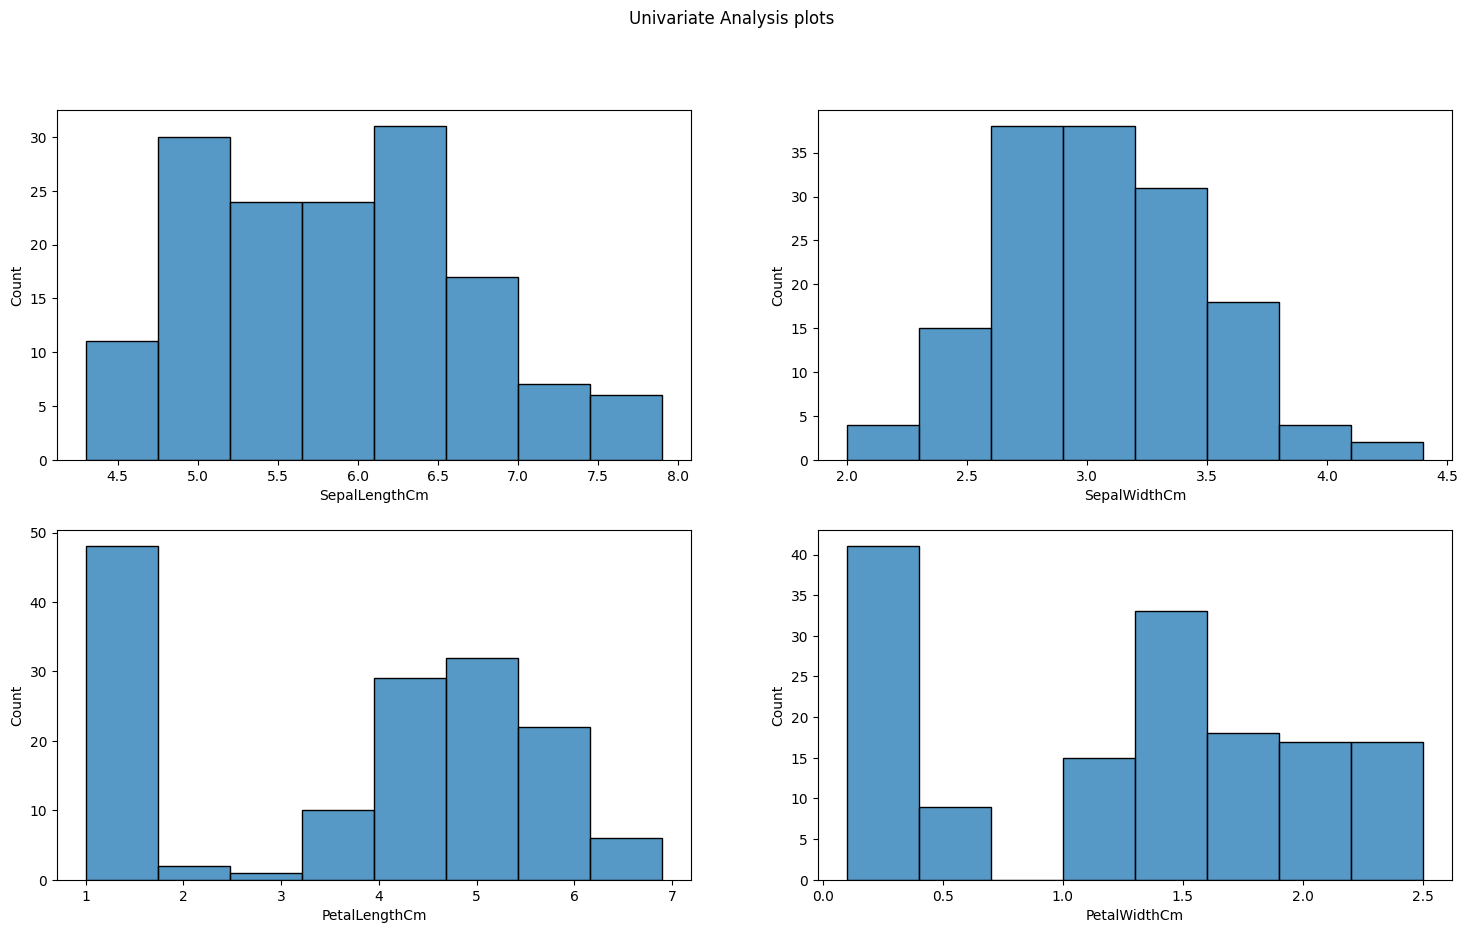

In [13]:
fig,axes = plt.subplots(2,2,figsize=(18,10))
fig.suptitle('Univariate Analysis plots')

sns.histplot(ax=axes[0,0],data = df1,x='SepalLengthCm',bins=8,edgecolor='black')
sns.histplot(ax=axes[0,1],data = df1,x='SepalWidthCm',bins=8,edgecolor='black')
sns.histplot(ax=axes[1,0],data = df1,x='PetalLengthCm',bins=8,edgecolor='black')
sns.histplot(ax=axes[1,1],data = df1,x='PetalWidthCm',bins=8,edgecolor='black')



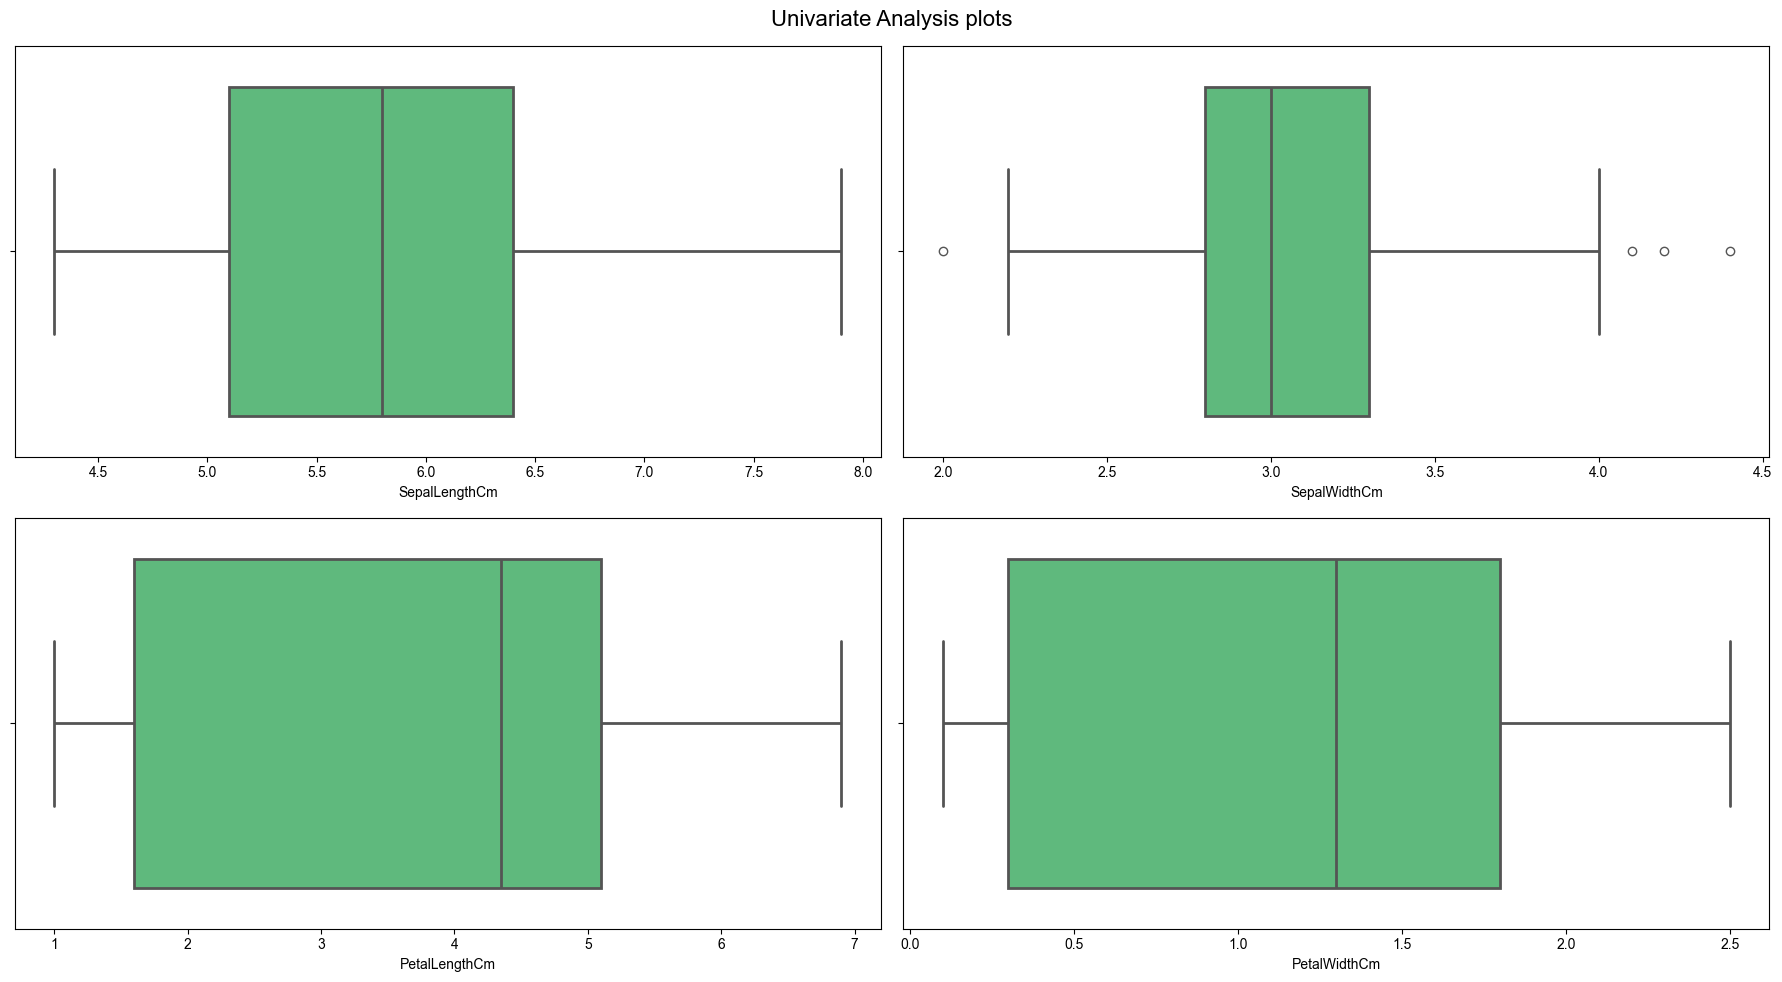

In [14]:
# Reviewing columns by plotting box plots to see the distribution of the data

fig,axes = plt.subplots(2,2,figsize=(18,10))
fig.suptitle('Univariate Analysis plots', fontsize=16)

sample_data1 = df1

# sns.boxplot(ax=axes[0,0],data = sample_data1,x='no_of_trainings',whis=1.5,palette="deep",legend=False)   #Neglect
sns.set(style='white')
boxplot_parameters = dict(whis=1.5,color='#50C878',linewidth=2,saturation=0.75,orient='h')

sns.boxplot(ax=axes[0,0],data = sample_data1,x='SepalLengthCm',**boxplot_parameters)

sns.boxplot(ax=axes[0,1],data = sample_data1,x='SepalWidthCm',**boxplot_parameters)

sns.boxplot(ax=axes[1,0],data = sample_data1,x='PetalLengthCm',**boxplot_parameters)

sns.boxplot(ax=axes[1,1],data = sample_data1,x='PetalWidthCm',**boxplot_parameters)

plt.tight_layout()



In [15]:
# Median values of numerical columns
for i in numerical_columns :
    if i != 'Id' :
        print("The median value of ",i," is : ",df[i].median())

The median value of  SepalLengthCm  is :  5.8
The median value of  SepalWidthCm  is :  3.0
The median value of  PetalLengthCm  is :  4.35
The median value of  PetalWidthCm  is :  1.3


#### Univariate analysis for categorical column

C:\Users\Naman\AppData\Local\Temp\ipykernel_2564\2221897088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Species'],palette="Set2")


<Axes: title={'center': 'Species count'}, xlabel='count', ylabel='Species'>

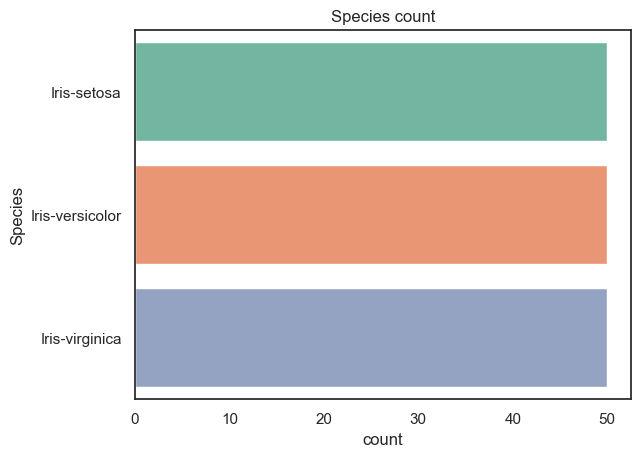

In [16]:
plt.title("Species count")
sns.countplot(df['Species'],palette="Set2")

    - This summarize that each species data is equaly distributed i.e. 50 entries for each species 
    - This visualization specifies that the species distribution is well balanced
    - Each species has 50 count

### <b>Bivariate Analysis</b>

In [17]:
segcols = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

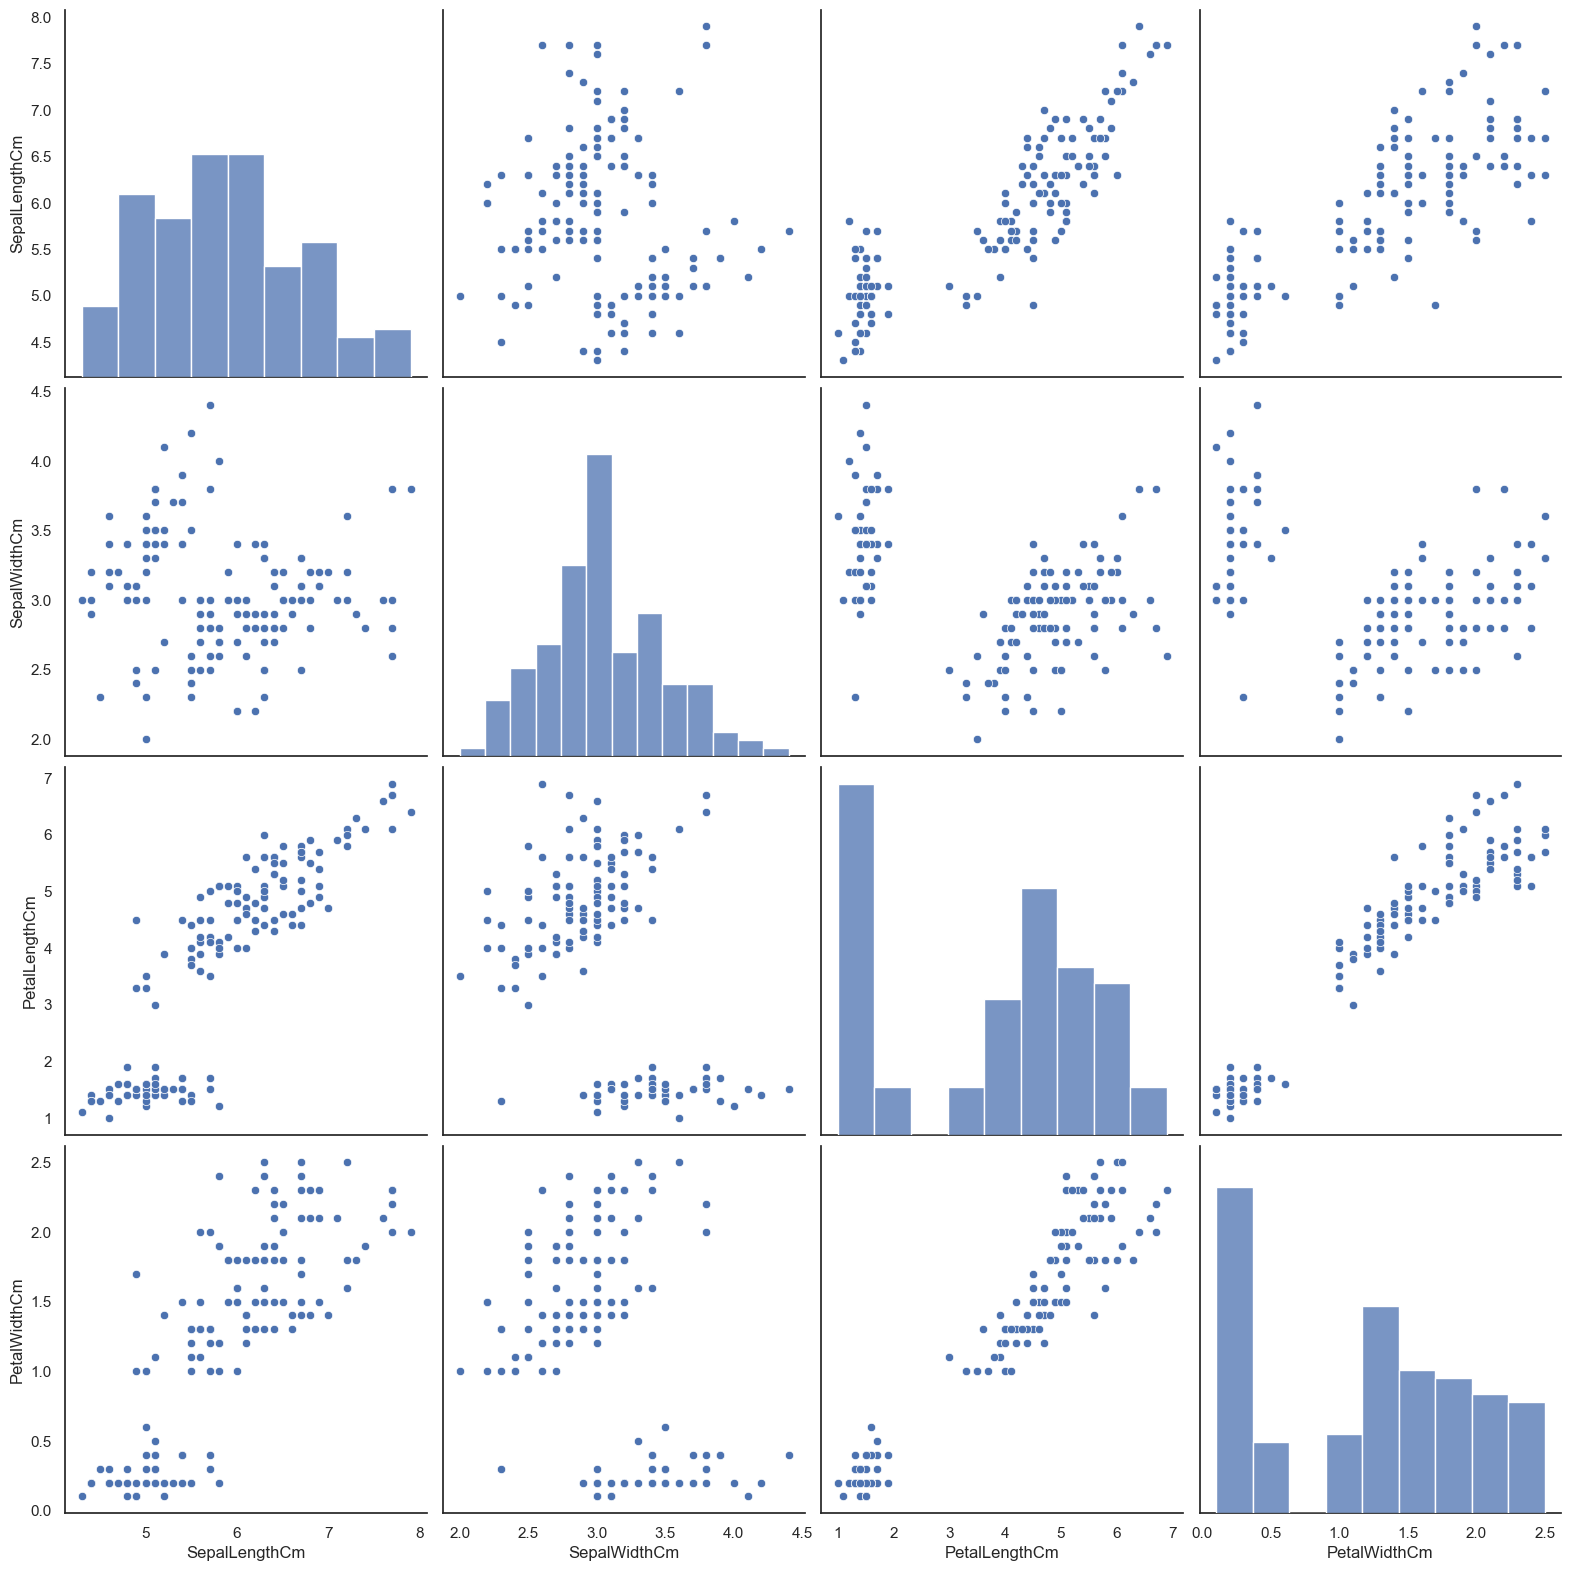

In [18]:
sns.pairplot(data=df1[segcols],height=4)

#### Differentiating between central tendencies of SepalLength with PetalLength :

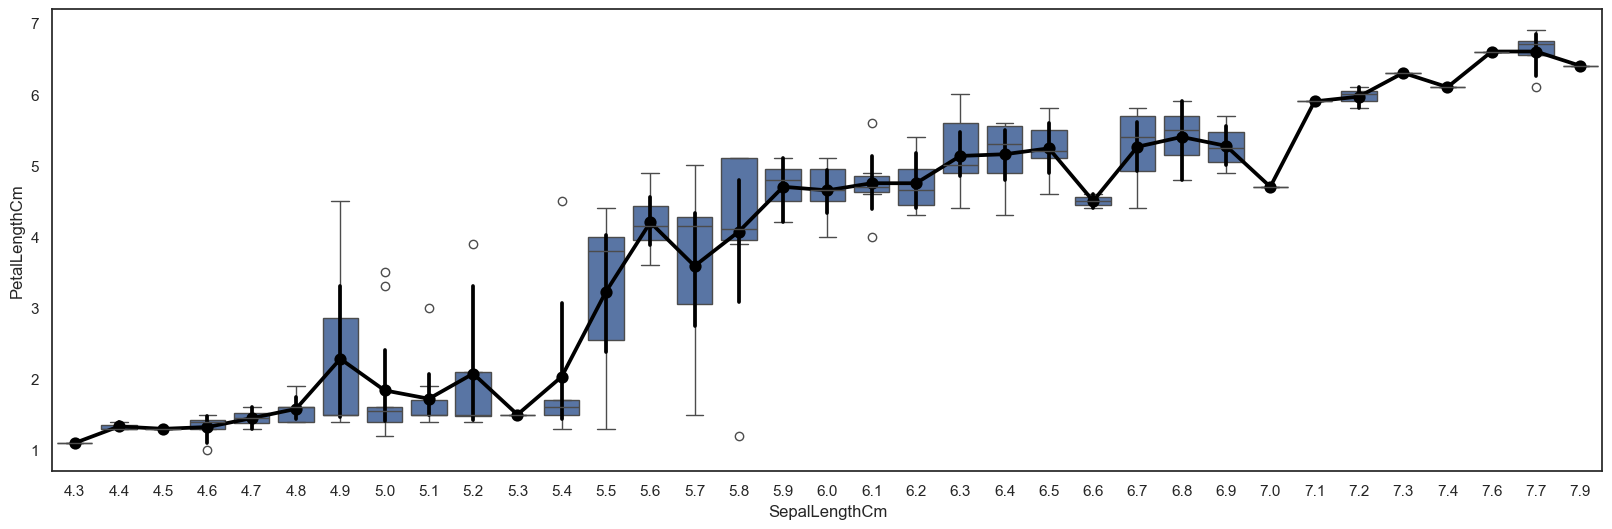

In [19]:
plt.figure(figsize=(20,6))
b = sns.boxplot(data = df1,x = "SepalLengthCm",y = "PetalLengthCm",orient='v')
sns.pointplot(data=df1, x="SepalLengthCm", y="PetalLengthCm", color='black', linestyles='-')
b.get_figure()
plt.show()

#### Differentiating between central tendencies of SepalWidth with PetalWidth :

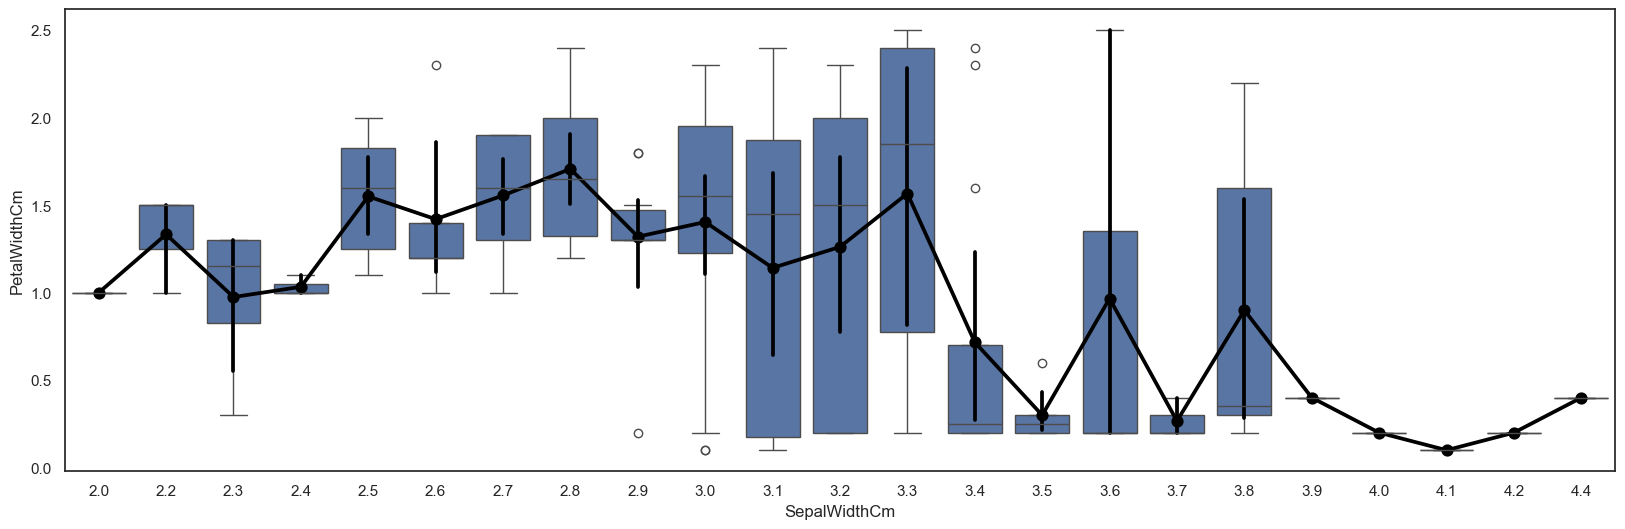

In [20]:
plt.figure(figsize=(20,6))
b = sns.boxplot(data = df1,x = "SepalWidthCm",y = "PetalWidthCm",orient='v')
sns.pointplot(data=df1, x="SepalWidthCm", y="PetalWidthCm", color='black', linestyles='-')
b.get_figure()
plt.show()

### <b>Multivariate Analysis</b>

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

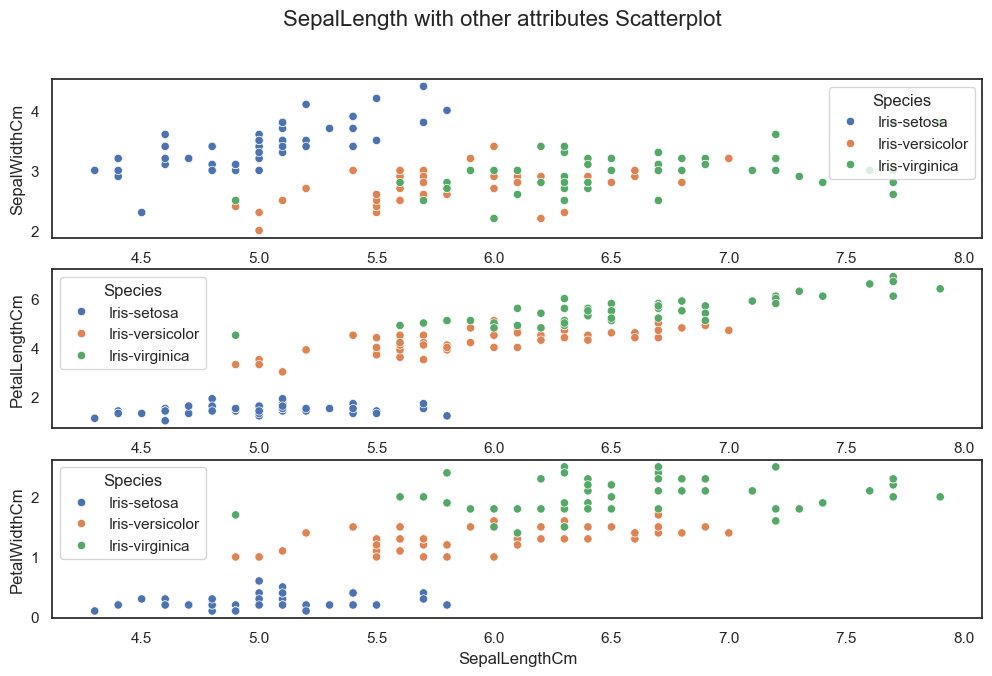

In [21]:
fig,axes = plt.subplots(3,1,figsize=(12,7))
fig.suptitle('SepalLength with other attributes Scatterplot', fontsize=16)

sns.scatterplot(ax=axes[0] ,data=df1, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
sns.scatterplot(ax=axes[1],data=df1, x="SepalLengthCm", y="PetalLengthCm",hue="Species")
sns.scatterplot(ax=axes[2],data=df1, x="SepalLengthCm", y="PetalWidthCm",hue="Species")




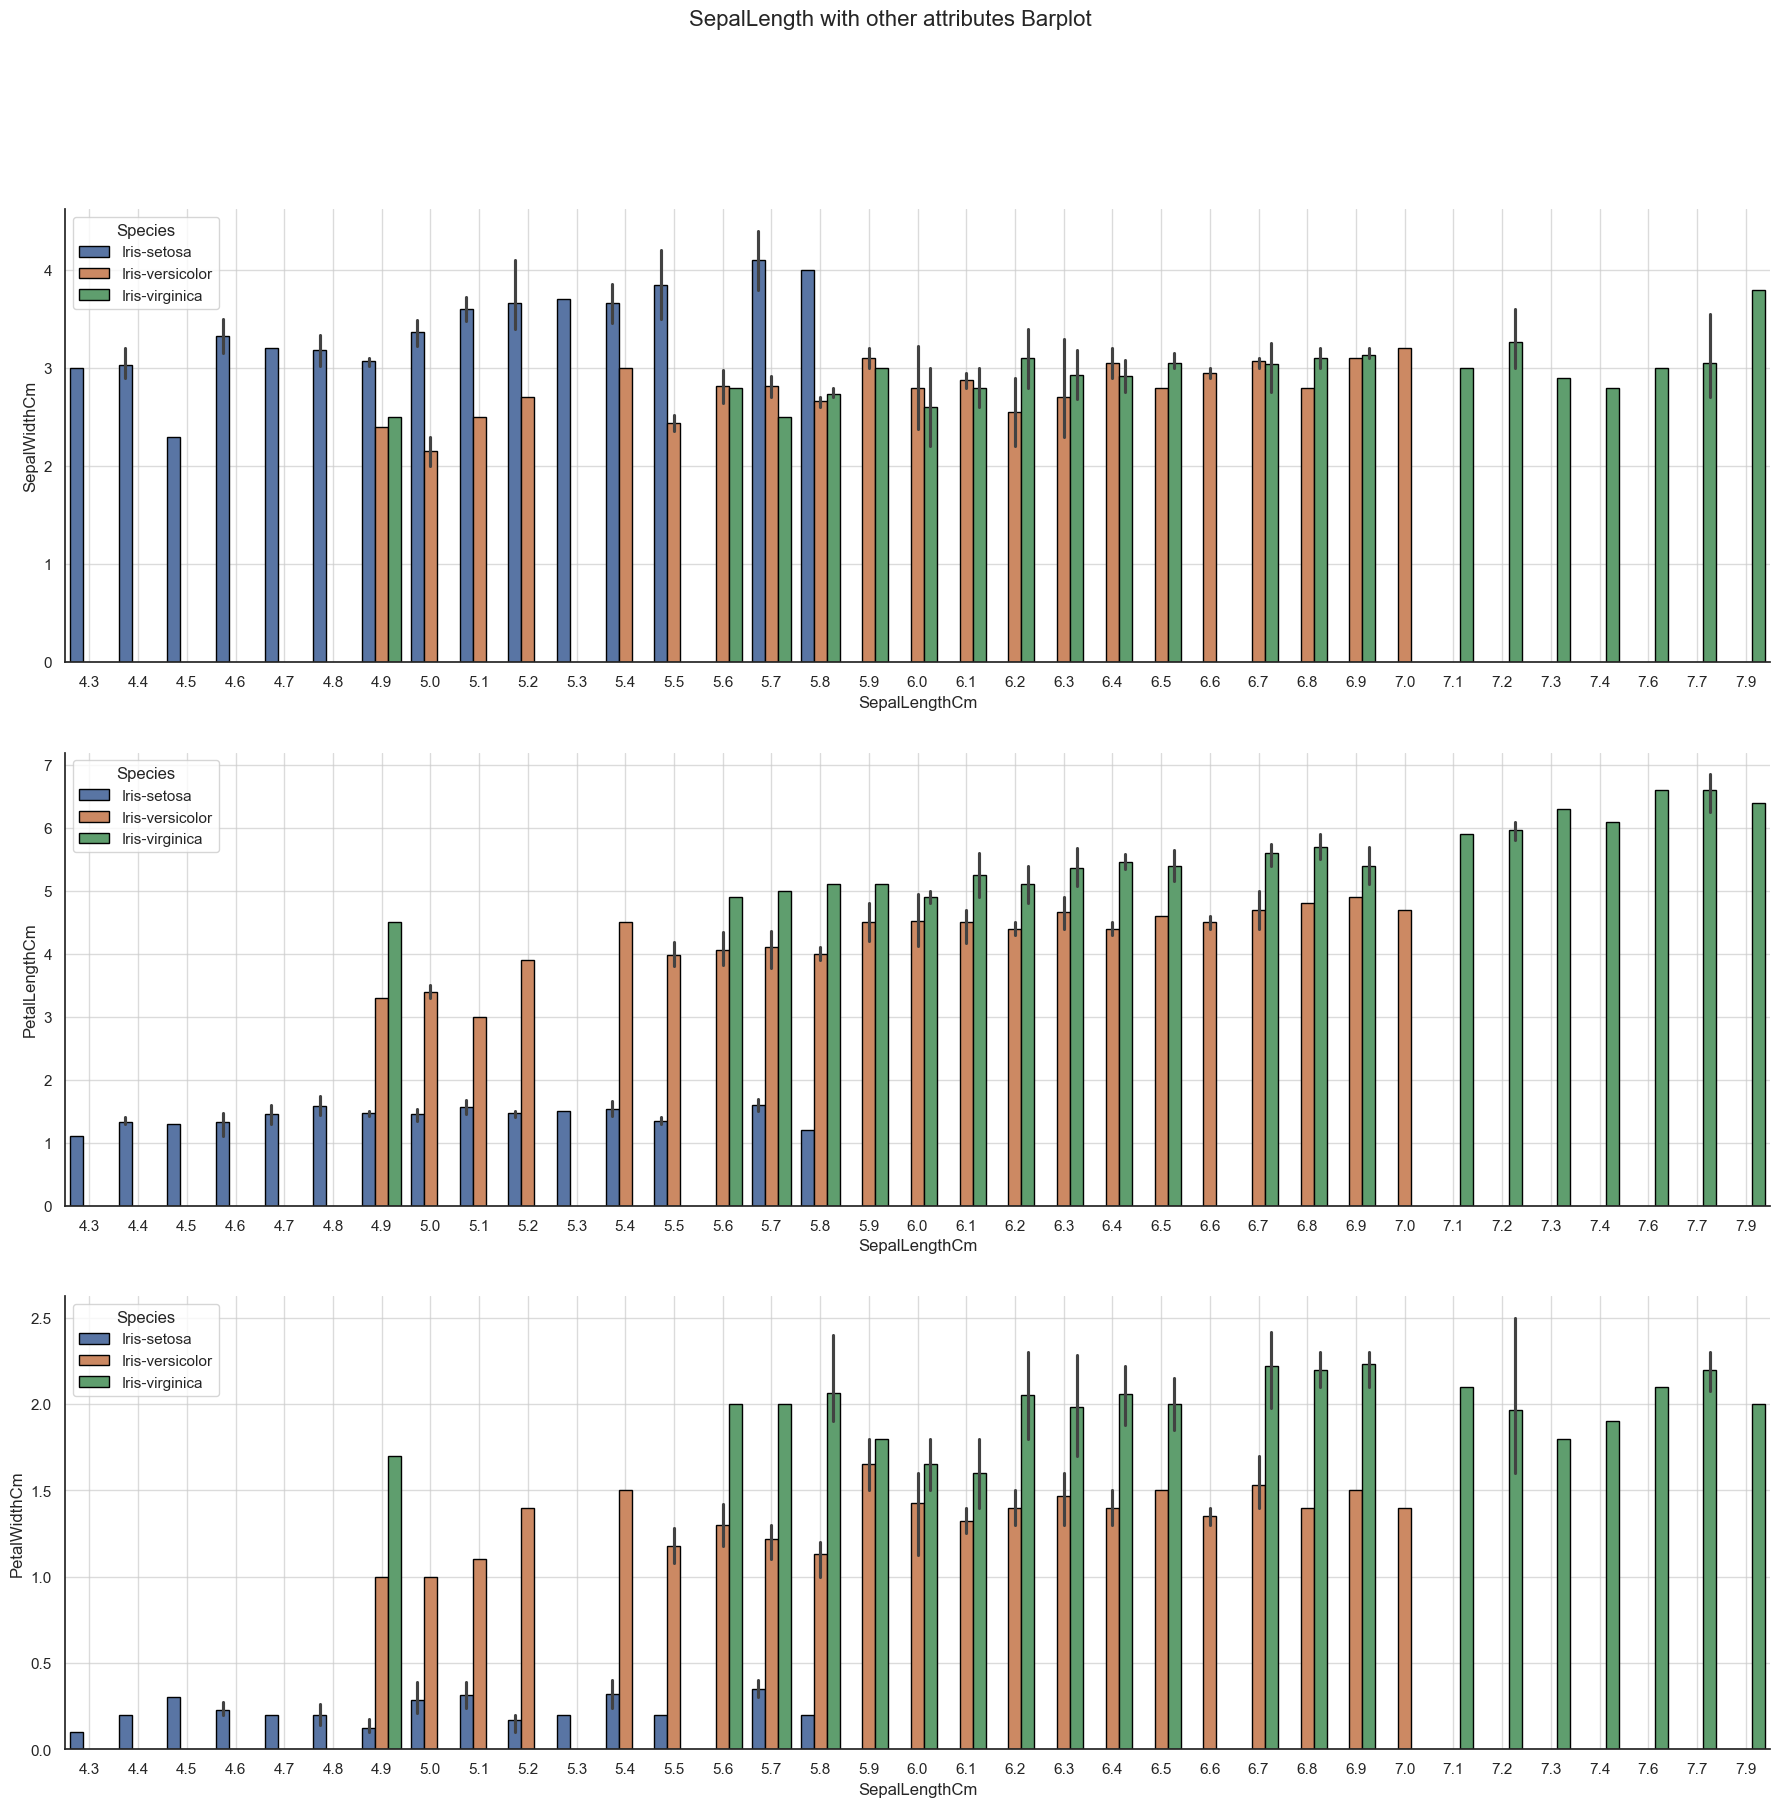

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(22, 20))
fig.suptitle('SepalLength with other attributes Barplot', fontsize=16)

sns.barplot(ax=axes[0], data=df1, x="SepalLengthCm", y="SepalWidthCm", hue="Species", edgecolor='black')
sns.barplot(ax=axes[1], data=df1, x="SepalLengthCm", y="PetalLengthCm", hue="Species", edgecolor='black')
sns.barplot(ax=axes[2], data=df1, x="SepalLengthCm", y="PetalWidthCm", hue="Species", edgecolor='black')

# Adding grids to all subplots
for ax in axes:
    ax.grid(True, linestyle='-', alpha=0.7)

sns.despine()
plt.show()

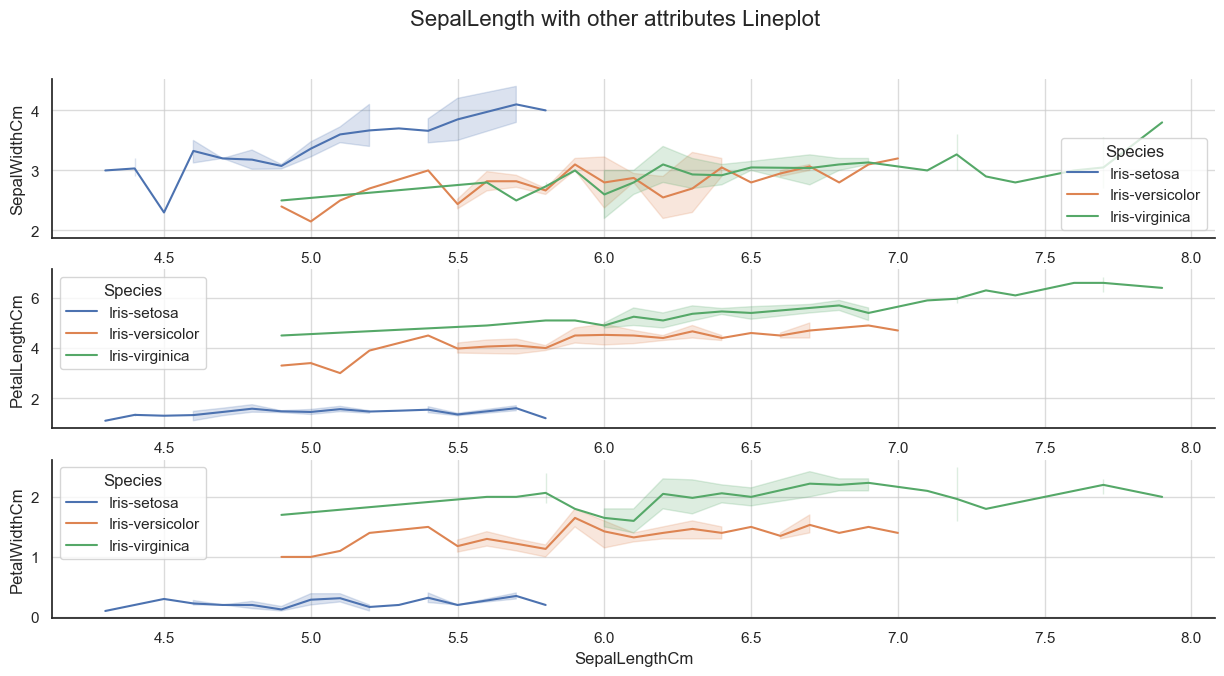

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(15,7))
fig.suptitle('SepalLength with other attributes Lineplot', fontsize=16)

sns.lineplot(ax=axes[0], data=df1, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
sns.lineplot(ax=axes[1], data=df1, x="SepalLengthCm", y="PetalLengthCm", hue="Species")
sns.lineplot(ax=axes[2], data=df1, x="SepalLengthCm", y="PetalWidthCm", hue="Species")

# Adding grids to all subplots
for ax in axes:
    ax.grid(True, linestyle='-', alpha=0.7)

sns.despine()
plt.show()

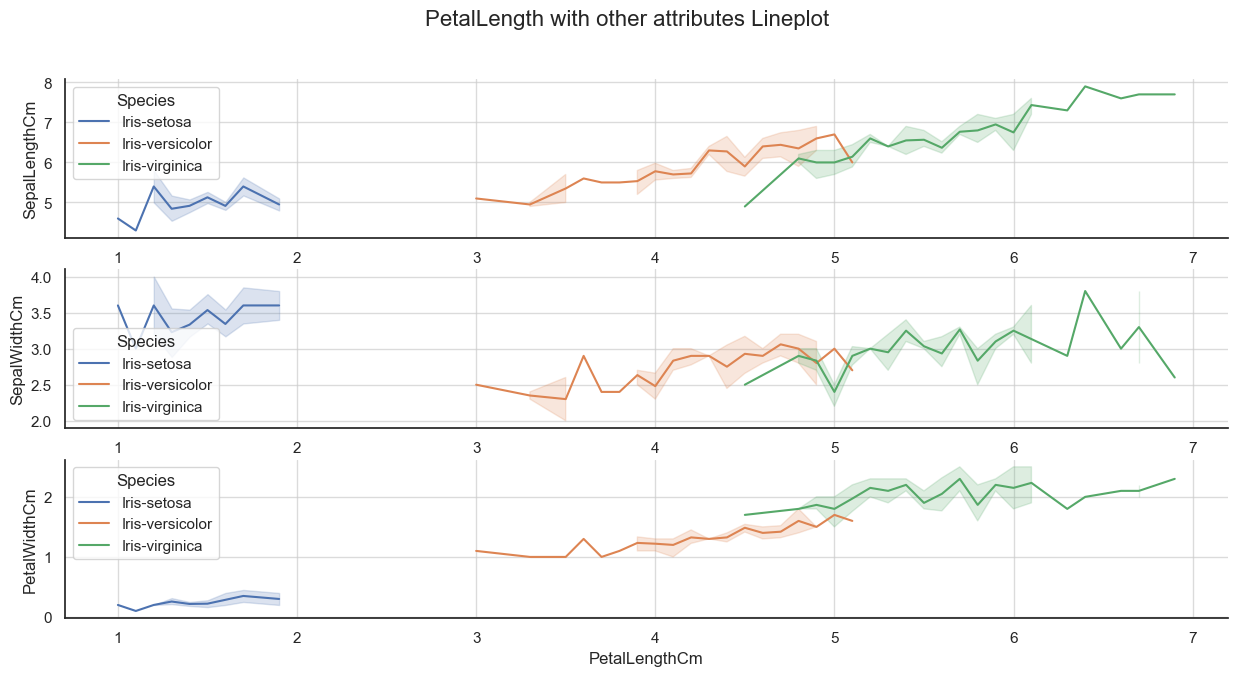

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(15,7))
fig.suptitle('PetalLength with other attributes Lineplot', fontsize=16)

sns.lineplot(ax=axes[0], data=df1, x="PetalLengthCm", y="SepalLengthCm", hue="Species")
sns.lineplot(ax=axes[1], data=df1, x="PetalLengthCm", y="SepalWidthCm", hue="Species")
sns.lineplot(ax=axes[2], data=df1, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

# Adding grids to all subplots
for ax in axes:
    ax.grid(True, linestyle='-', alpha=0.7)

sns.despine()
plt.show()

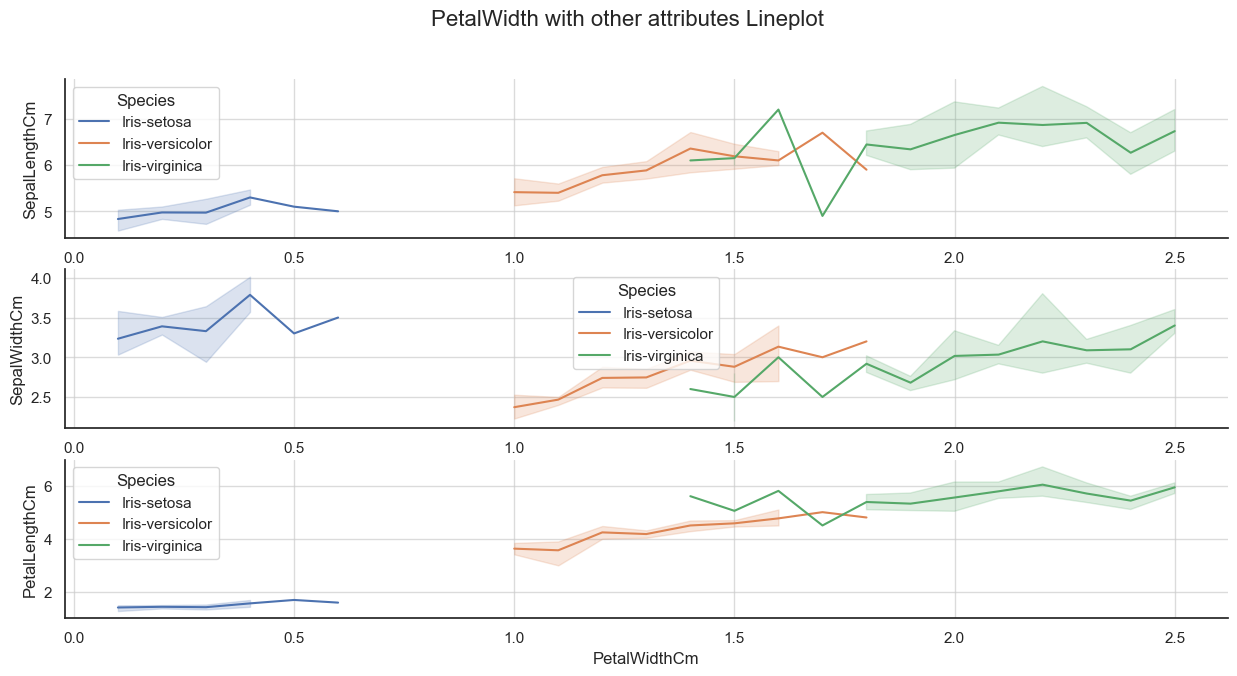

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(15,7))
fig.suptitle('PetalWidth with other attributes Lineplot', fontsize=16)

sns.lineplot(ax=axes[0], data=df1, x="PetalWidthCm", y="SepalLengthCm", hue="Species")
sns.lineplot(ax=axes[1], data=df1, x="PetalWidthCm", y="SepalWidthCm", hue="Species")
sns.lineplot(ax=axes[2], data=df1, x="PetalWidthCm", y="PetalLengthCm", hue="Species")

# Adding grids to all subplots
for ax in axes:
    ax.grid(True, linestyle='-', alpha=0.7)

sns.despine()
plt.show()

<Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

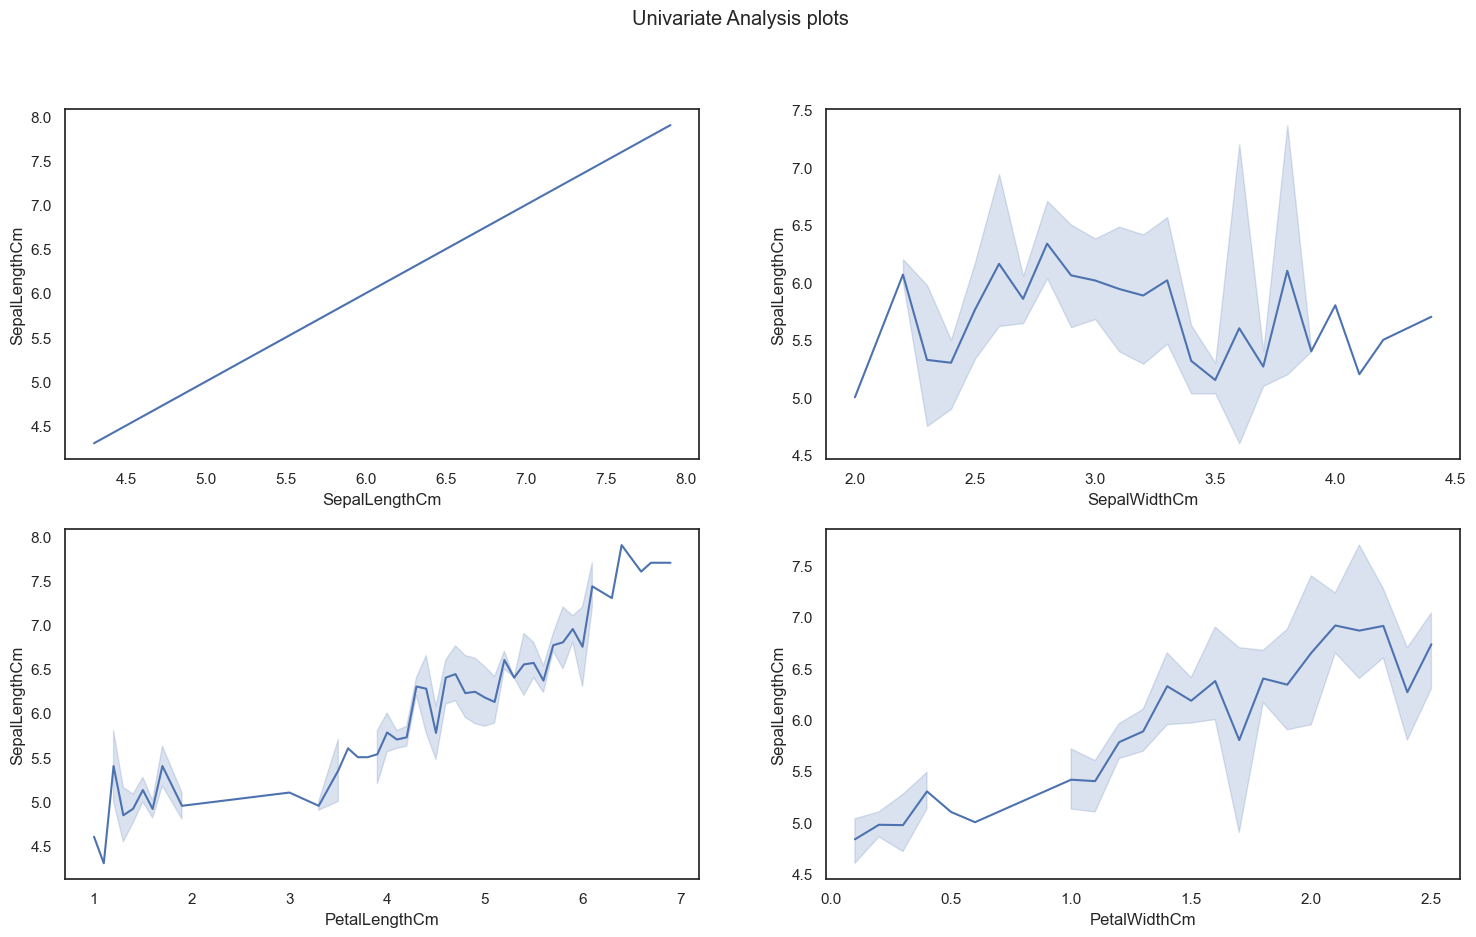

In [26]:
fig,axes = plt.subplots(2,2,figsize=(18,10))
fig.suptitle('Univariate Analysis plots')

sns.lineplot(ax=axes[0,0],data = df1,x='SepalLengthCm',y='SepalLengthCm')
sns.lineplot(ax=axes[0,1],data = df1,x='SepalWidthCm',y='SepalLengthCm')
sns.lineplot(ax=axes[1,0],data = df1,x='PetalLengthCm',y='SepalLengthCm')
sns.lineplot(ax=axes[1,1],data = df1,x='PetalWidthCm',y='SepalLengthCm')

<Axes: >

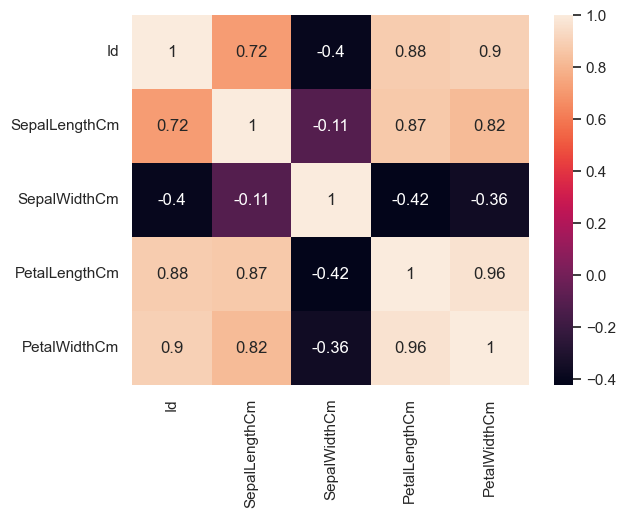

In [27]:
sns.heatmap(df1[numerical_columns].corr(),annot=True)

C:\Users\Naman\AppData\Local\Temp\ipykernel_2564\3262571800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0,0],x = df1['SepalLengthCm'])
C:\Users\Naman\AppData\Local\Temp\ipykernel_2564\3262571800.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0,1],x = df1['PetalLength

<Axes: ylabel='Density'>

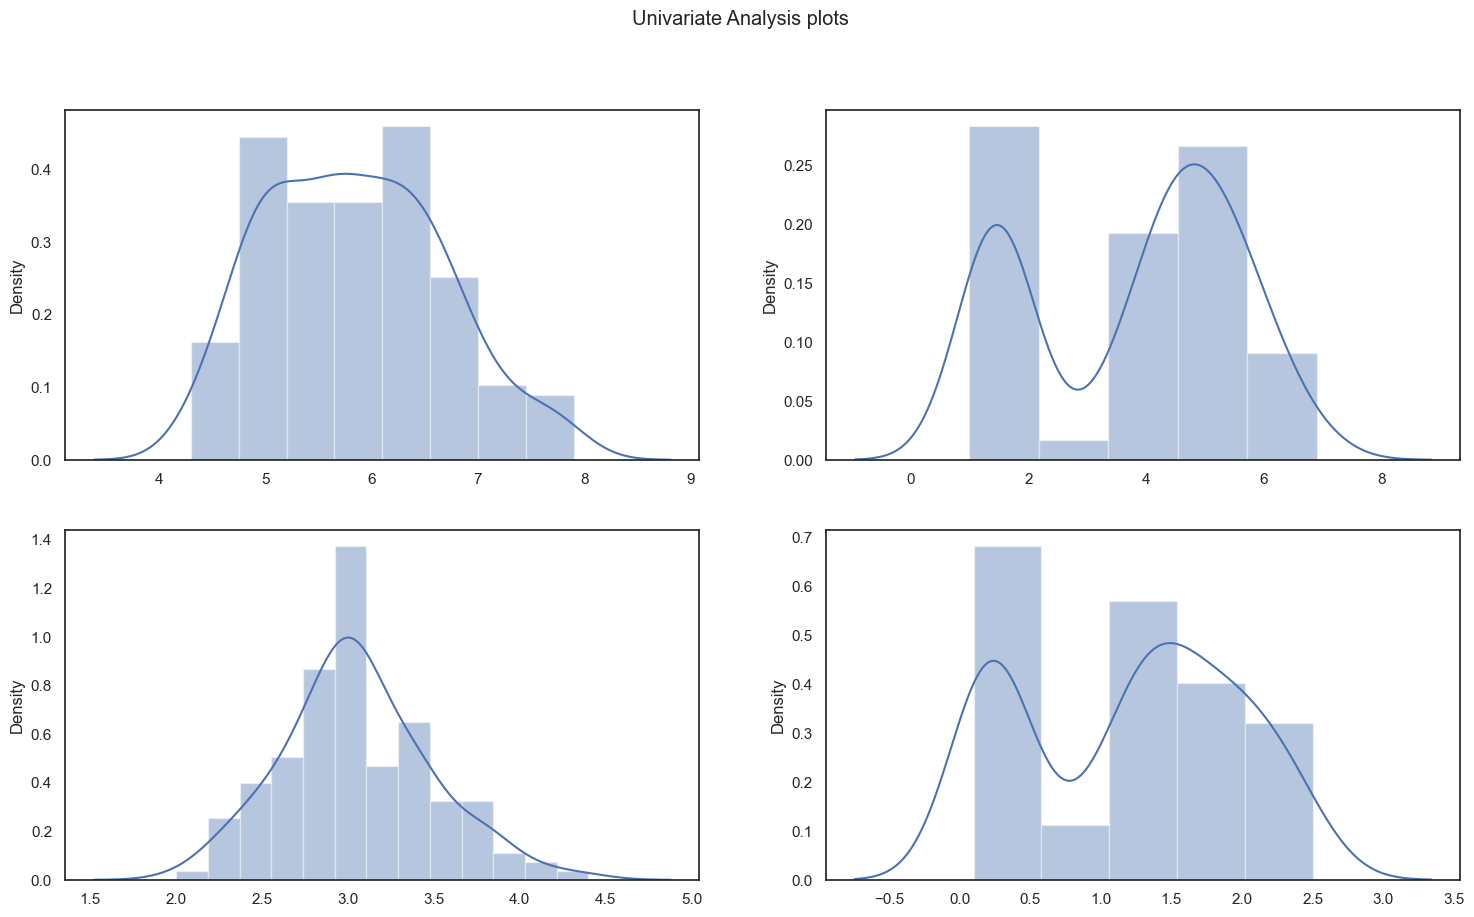

In [28]:
fig,axes = plt.subplots(2,2,figsize=(18,10))
fig.suptitle('Univariate Analysis plots')

sns.distplot(ax=axes[0,0],x = df1['SepalLengthCm'])
sns.distplot(ax=axes[0,1],x = df1['PetalLengthCm'])
sns.distplot(ax=axes[1,0],x = df1['SepalWidthCm'])
sns.distplot(ax=axes[1,1],x = df1['PetalWidthCm'])

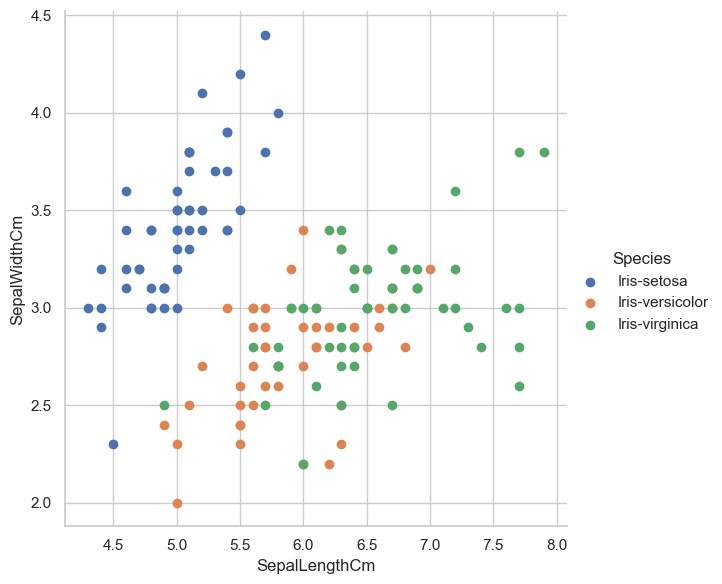

In [29]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue='Species', height=6).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

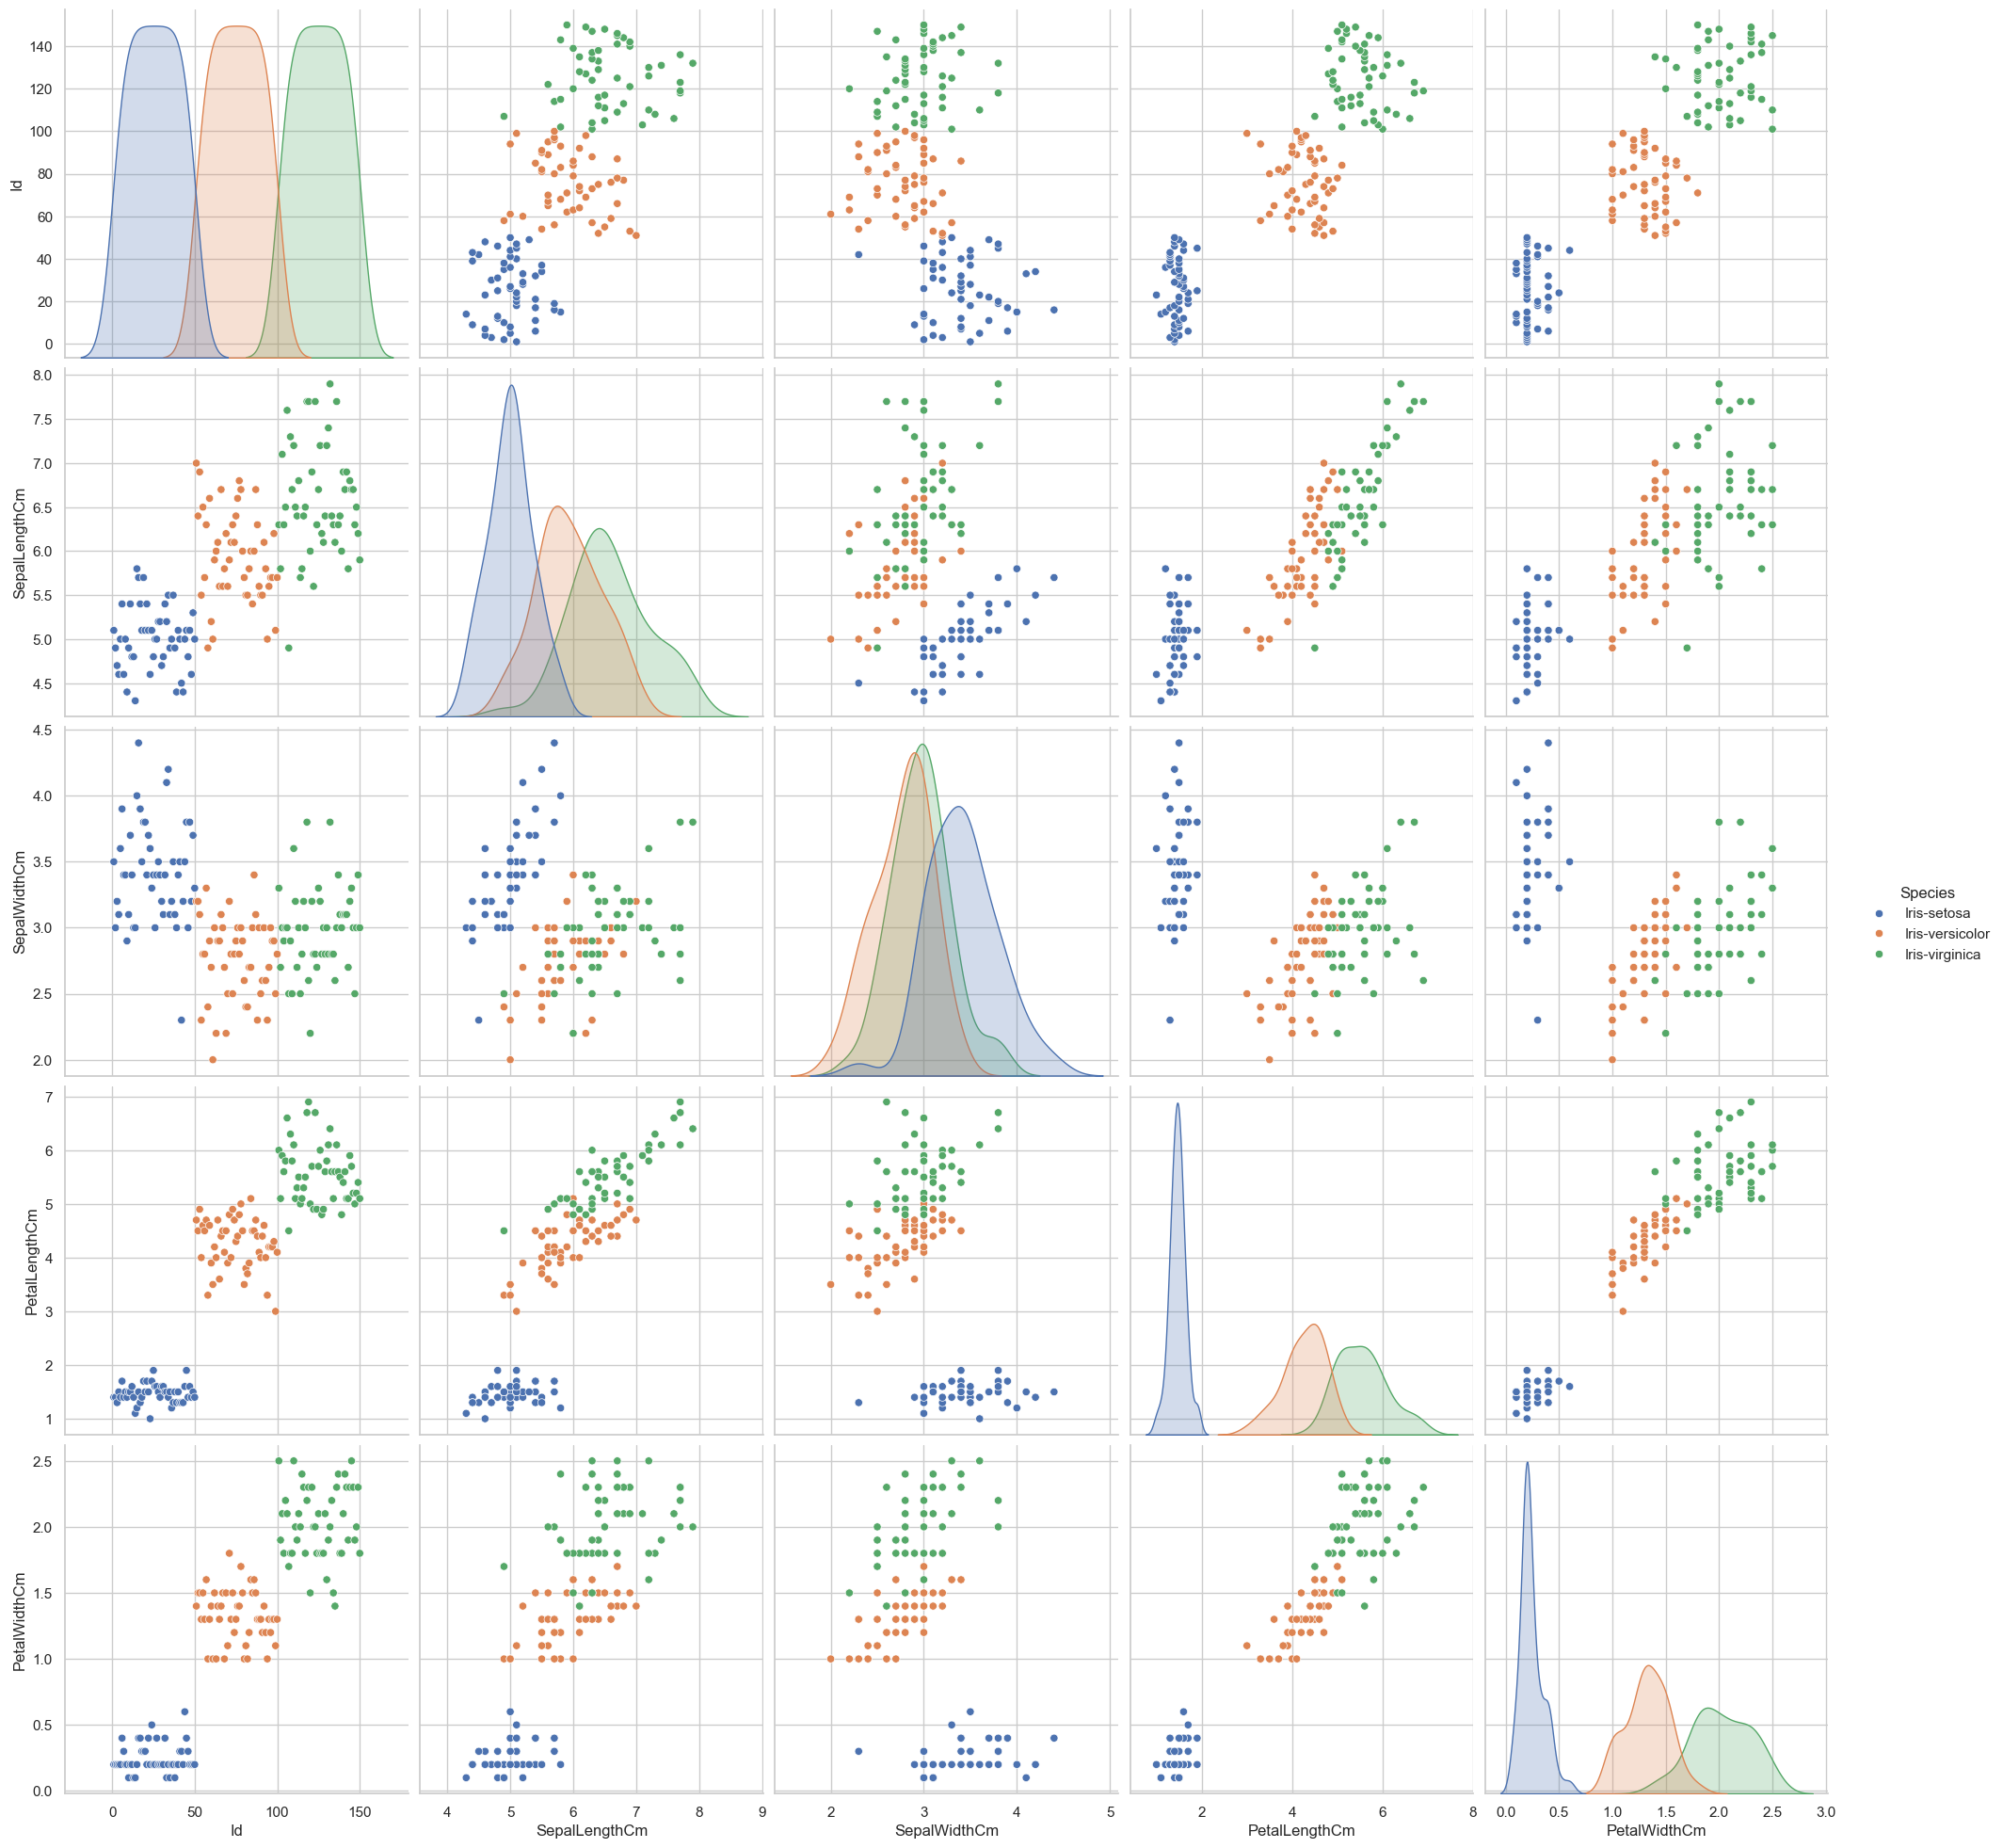

In [30]:
sns.pairplot(df1, hue='Species', height=4)